# Case Housing Prices

# Inspeção Inicial

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import scipy
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
DATA_RAW = 'house_pricing.csv'

In [3]:
df_house = pd.read_csv(DATA_RAW , sep = ',')

In [4]:
df_house.head()

,price,num_bed,num_bath,size_house,size_lot,num_floors,is_waterfront,condition,size_basement,year_built,renovation_date,zip,latitude,longitude,avg_size_neighbor_houses,avg_size_neighbor_lot
0,239000,3,1.0,1510,15022,1.0,0,3,0,1962,0,98003,47.330433,-122.303609,1510,12970
1,1260000,3,3.5,3220,3960,2.0,0,3,460,1991,0,98116,47.590933,-122.384230,3080,4444
2,414500,3,1.0,1050,6002,1.0,0,3,210,1941,0,98115,47.698761,-122.316010,1180,6003
3,252500,3,2.5,1780,7192,1.0,0,4,530,1974,0,98031,47.409319,-122.173484,1870,8500
4,389000,3,1.0,1330,3740,1.5,0,3,0,1903,0,98118,47.550242,-122.274232,1330,5053


- Quantidade de linhas, quantidade de colunas
- Titulo das colunas e o que elas significam (comparar com a descrição inicial. Elas fazem sentido?)
- Tipo dos dados, não apenas se são numéricas ou texto. O que elas são de fato. São numéricas mas deveriam ser categorias ou datetime?
- Visão geral dos valores que as variáveis podem assumir (análise de inconsistências nos dados)
- Duplicatas (linhas e colunas)?
- Missing Values

Codificar o planejamento e Registrar o que foi encontrado em forma de texto, como se estivesse fazendo um relatório sobre seus achados.

In [5]:
# checando a quantidade
print(f'linhas: {df_house.shape[0]}\ncolunas: {df_house.shape[1]}' )

linhas: 1845
colunas: 16


In [6]:
# tipo de dados
df_house.dtypes

price                         int64
num_bed                       int64
num_bath                    float64
size_house                    int64
size_lot                      int64
num_floors                  float64
is_waterfront                 int64
condition                     int64
size_basement                 int64
year_built                    int64
renovation_date               int64
zip                           int64
latitude                    float64
longitude                   float64
avg_size_neighbor_houses      int64
avg_size_neighbor_lot         int64
dtype: object

- **price** - Ainda que esperássemos um tipo float, o tipo int também cabe nessa variável.
- **num_bed** - O tipo inteiro é apropriado
- **num_bath** - Inicialmente, parece estranho, mas essa variável estar como float reflete algo relacionado ao negócio (forma como os banheiros são vistos no USA)
- **size_house** - O tipo inteiro é apropriado
- **size_lot** - O tipo inteiro é apropriado
- **num_floors** - O tipo float parece estranho, mas pode ser a mesma lógica de num_bath.
- **is_waterfront** - Essa variável é qualitativa. Assim, poderia ser definida como object. Porém, notamos que é uma variável do tipo dummy, ou seja, já foi convertida para número e pode ser utilizada na modelagem
- **condition** - Essa variável poderia vir como object, já que traz uma característica qualitativa. Porém, o próprio dataset já a trata como numérica. Assim, vou admitir que as distâncias entre os níveis qualidade do imóvel estão igualmente espaçados e tem a referência 1. Ou seja, é uma varíavel ratio e podemos usá-la da forma que está
- **size_basement** - O tipo inteiro é apropriado
- **year_built** - O tipo inteiro é apropriado
- **renovation_date** - O tipo inteiro é apropriado
- **zip** - Aqui poderia ser inteiro ou object, podemos considerar como uma variável qualitativa.
- **latitude** - O tipo float é apropriado
- **longitude** - O tipo float é apropriado
- **avg_size_neighbor_houses** - O tipo inteiro é apropriado
- **avg_size_neighbor_lot** - O tipo inteiro é apropriado


In [7]:
# analisar inconsistências 
df_house.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1845.0,557127.039024,403208.183409,81000.000000,325000.000000,457000.000000,665000.000000,7.062500e+06
num_bed,1845.0,3.379946,0.939221,0.000000,3.000000,3.000000,4.000000,9.000000e+00
num_bath,1845.0,2.140108,0.785074,0.000000,1.750000,2.250000,2.500000,6.750000e+00
size_house,1845.0,2128.444986,955.754345,410.000000,1440.000000,1950.000000,2620.000000,1.004000e+04
size_lot,1845.0,15642.503523,41323.934402,649.000000,5100.000000,7700.000000,11060.000000,1.024068e+06
num_floors,1845.0,1.518970,0.549520,1.000000,1.000000,1.500000,2.000000,3.500000e+00
is_waterfront,1845.0,0.014092,0.117903,0.000000,0.000000,0.000000,0.000000,1.000000e+00
condition,1845.0,3.382114,0.634172,1.000000,3.000000,3.000000,4.000000,5.000000e+00
size_basement,1845.0,290.643902,461.995804,0.000000,0.000000,0.000000,550.000000,4.820000e+03
year_built,1845.0,1971.820054,29.097993,1900.000000,1952.000000,1976.000000,1997.000000,2.015000e+03


- Valores Negativos: O único valor negativo é de longitude e é aceitável.

- Zeros: Vemos que, além das variáveis is_waterfront, size_basement e renovation_date que, em tese, poderiam admitir tais valores, de acordo com a descrição dos dados, as variaveis num_bed e num_bath também aparecem com valores zero. Ou seja, isso significa que existem casas com 0 banheiros e 0 quartos?????

In [8]:
# checando valores únicos nas variáveis de range limitado e classes
list_unique_check = ['is_waterfront' , 'condition' , 'zip']
for col in list_unique_check:
    unique_values = df_house[col].unique()
    print(f'A coluna {col} possui {len(unique_values)} valores distintos que são: {unique_values}')

A coluna is_waterfront possui 2 valores distintos que são: [0 1]
A coluna condition possui 5 valores distintos que são: [3 4 5 2 1]
A coluna zip possui 70 valores distintos que são: [98003 98116 98115 98031 98118 98103 98023 98042 98112 98075 98117 98058
 98002 98146 98034 98038 98133 98125 98168 98004 98005 98056 98053 98029
 98119 98052 98028 98033 98030 98199 98001 98109 98072 98166 98155 98007
 98077 98027 98055 98006 98107 98188 98008 98126 98144 98011 98177 98136
 98032 98059 98070 98019 98198 98102 98065 98092 98022 98178 98106 98040
 98105 98010 98074 98122 98045 98039 98024 98108 98014 98148]


- Valores Únicos: De fato as variáveis citadas possuem os valores únicos descritos no início do problema. Ja a variável zip, como esperado, possui diversos possiveis valores.

In [9]:
# dados duplicados nas linhas
print(f'Temos {df_house.duplicated().sum()} linhas duplicadas')

Temos 0 linhas duplicadas


In [10]:
# dados duplciados nas colunas
print(f'Temos {df_house.T.duplicated().sum()} nas colunas')

Temos 0 nas colunas


- Duplicatas: Não foram encontradas nem duplicatas nas linhas nem nas colunas.

In [11]:
#checando missing values
df_house.isna().sum()

price                       0
num_bed                     0
num_bath                    0
size_house                  0
size_lot                    0
num_floors                  0
is_waterfront               0
condition                   0
size_basement               0
year_built                  0
renovation_date             0
zip                         0
latitude                    0
longitude                   0
avg_size_neighbor_houses    0
avg_size_neighbor_lot       0
dtype: int64

- Missing Values: Sem missing values no dataset

# Análise Exploratória de Dados (EDA)

Seria interessante se você:
- Estudasse as distribuições das variáveis (histogramas, boxplots, Quartis, Valor Máximo e Mínimo)
- Estudasse as relações entre as variáveis envolvidas (gráficos de dispersão, histogramas, boxplots, testes de correlação e associação, entre outros)
- Levantasse questionamentos sobre os problemas (levante hipóteses sobre os dados e tente respondê-las usando suas análises)

Detalhe: Antes de iniciar a análise exploratória, dividam os dados em treino e teste. 

In [12]:
df_train_house , df_test_house = train_test_split(df_house , train_size = 0.7 , random_state =123)

De agora em diante lidaremos apenas com o nosso conjunto de treinamento.

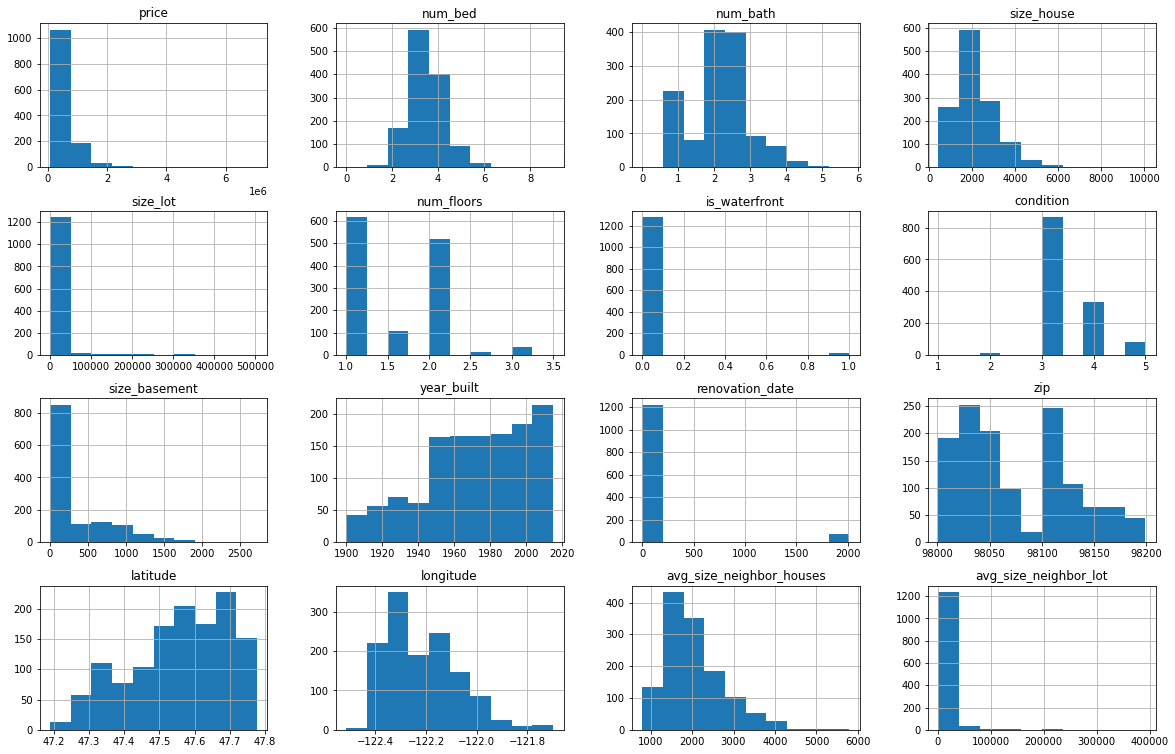

In [13]:
# Estudo das distribuições das variáveis
df_train_house.hist(figsize=(20,13));

Nossa variável resposta, price, é assimétrica. Poderemos propor uma transformação para ela.

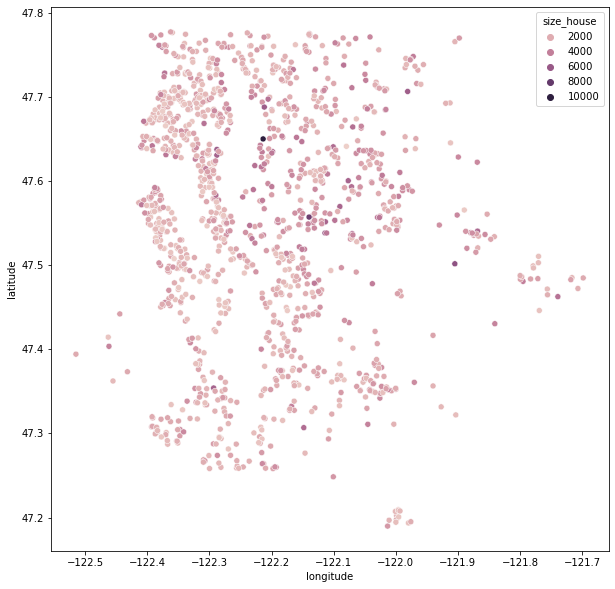

In [14]:
# H1 há alguma relação entre a geografia e o tamanho das casas ?
plt.figure(figsize = (10,10))
sns.scatterplot(x=df_train_house.longitude , y=df_train_house.latitude, hue=df_train_house.size_house);
plt.show()

Como temos uma calda alongada na variável size_house, vamos aplicar um log e observar o gráfico novamente;

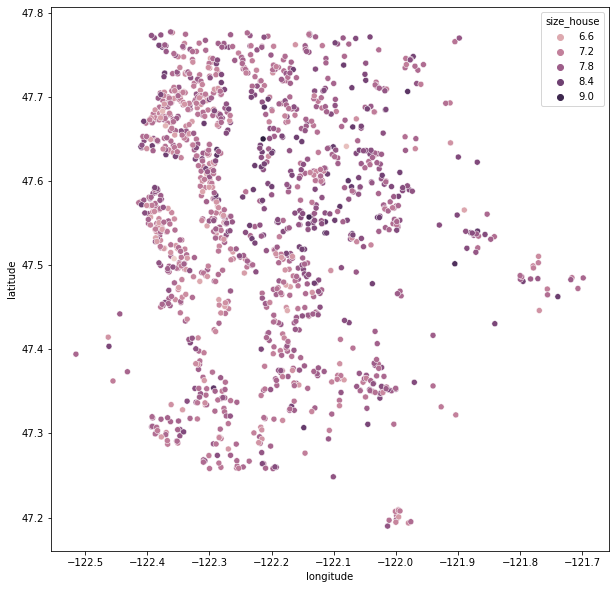

In [15]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=df_train_house.longitude , y=df_train_house.latitude , hue=np.log(df_train_house.size_house));
plt.show()

Parece haver maior densidade de casas maiores mais ao centro.

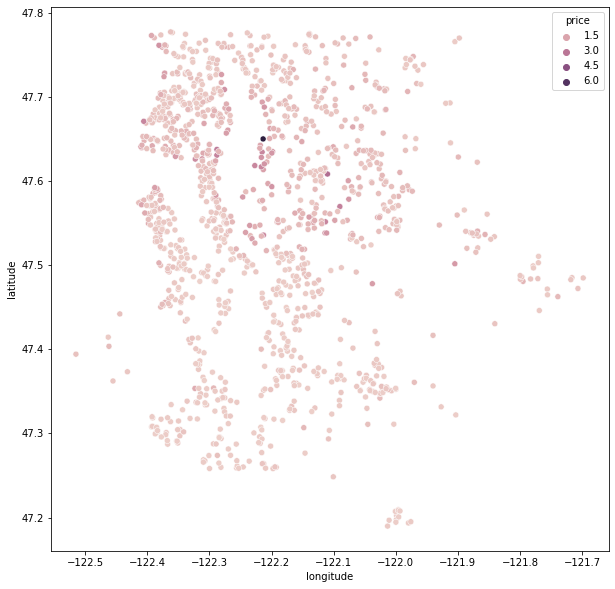

In [16]:
# H2: Há relação entre a geografia e o preço das casas
plt.figure(figsize=(10,10))
sns.scatterplot(x=df_train_house.longitude , y=df_train_house.latitude , hue = df_train_house.price);
plt.show()

Pelo mesmo motivo da variável size_house, vamos aplicar o log

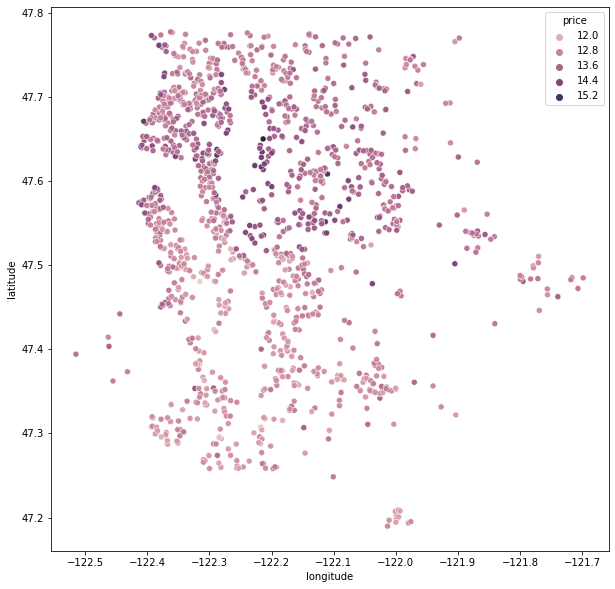

In [17]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=df_train_house.longitude , y=df_train_house.latitude , hue = np.log(df_train_house.price));
plt.show()

As casas mais caras parecem estar mais localizadas ao centro, coincidindo com a informação de tamanho.

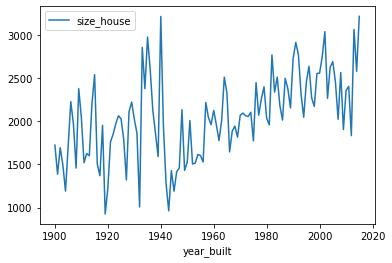

In [18]:
#H3 casas mais velhas são maiores e mais centrais: Usando média
df_train_house.pivot_table(values='size_house' , columns = 'year_built' , aggfunc='mean').T.plot()
plt.show()

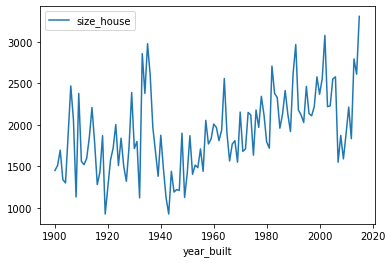

In [19]:
#H3 casas mais velhas são maiores e mais centrais: Usando mediana
df_train_house.pivot_table(values='size_house', columns='year_built',aggfunc='median').T.plot()
plt.show()

Na verdade, as casas tem aumentado de tamanho ao longo dos anos.

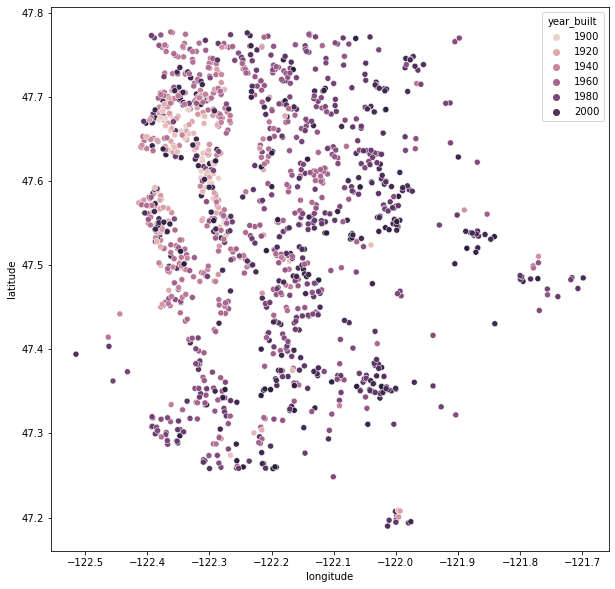

In [20]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=df_train_house.longitude, y=df_train_house.latitude, hue=df_train_house.year_built);
plt.show()

As casas mais antigas se concentram mais no canto superior esquerdo. É um indício de uma área mais antiga da cidade, a partir de onde a cidade cresceu;

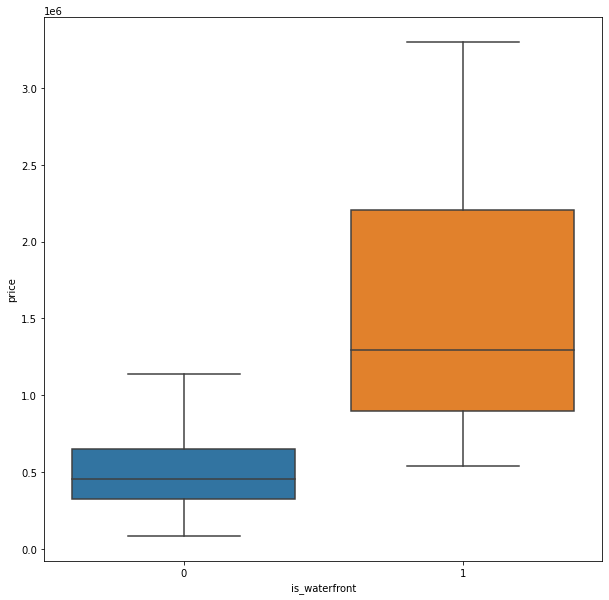

In [21]:
# H4: Casas waterfront são mais caras e mais afastadas
plt.figure(figsize=(10,10))
sns.boxplot(x='is_waterfront' , y='price' , data = df_train_house , showfliers = False)
plt.show()

In [22]:
is_waterfront_true_price = df_train_house.loc[df_train_house['is_waterfront']==1, ['price']]
is_waterfront_false_price = df_train_house.loc[df_train_house['is_waterfront']==0, ['price']]

In [23]:
# test t de duas amostras
scipy.stats.ttest_ind(is_waterfront_true_price, is_waterfront_false_price, equal_var=False)

Ttest_indResult(statistic=array([3.18538644]), pvalue=array([0.00660206]))

A média de preço é maior para casas waterfront. 

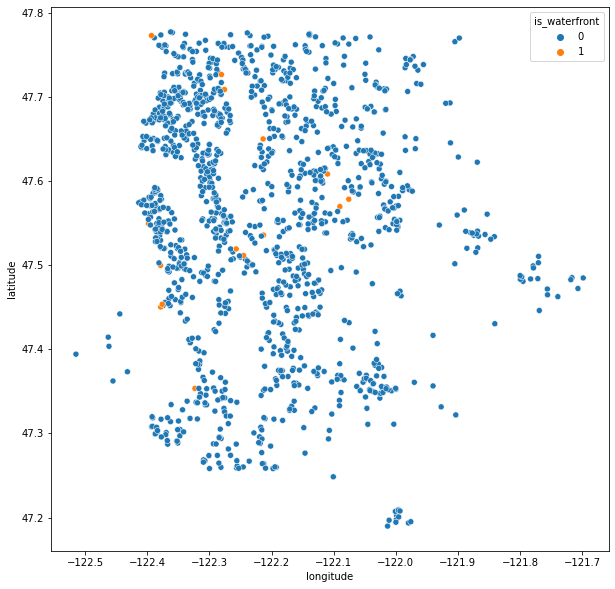

In [24]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = df_train_house.longitude , y = df_train_house.latitude , hue = df_train_house.is_waterfront)
plt.show()

Esperávamos que as casas waterfront fossem mais afastadas, mas esse padrão não fica evidente. Pesquisando, descobrimos que casas waterfront são aquelas que possuem qualquer coisa de água na frente.  OU seja, não precisa ser de frente para praia, rio ou outra coisa necessariamente. É algo que ajuda na ornamentação da casa.

In [25]:
# medindo e testando correlação
df_train_house.corr()['price'].sort_values(ascending = True)

zip                        -0.040757
longitude                   0.002704
year_built                  0.006759
avg_size_neighbor_lot       0.061243
condition                   0.067655
size_lot                    0.114703
num_floors                  0.206018
renovation_date             0.214391
num_bed                     0.288304
latitude                    0.305275
is_waterfront               0.346088
size_basement               0.408339
num_bath                    0.516932
avg_size_neighbor_houses    0.588096
size_house                  0.731971
price                       1.000000
Name: price, dtype: float64

In [26]:
num_cols = df_train_house.drop('is_waterfront' , axis = 1).columns.tolist()

In [27]:
correlation_features = []
for col in num_cols:
    cor, p = scipy.stats.pearsonr(df_train_house[col], df_train_house['price'])
    if p <= 0.05:
        print(f'p-value: {p},  correlation: {cor}')
        print(f'Existe correlação diferente de zero entre {col} e price.')
        print('--'*30)
        correlation_features.append(col)


    else:
        print(f'p-value: {p},  correlation: {cor}')
        print(f'Não existe correlação diferente de zero entre {col} e price.')
        print('--'*30)

p-value: 0.0,  correlation: 1.0
Existe correlação diferente de zero entre price e price.
------------------------------------------------------------
p-value: 3.925789712182652e-26,  correlation: 0.28830382026202594
Existe correlação diferente de zero entre num_bed e price.
------------------------------------------------------------
p-value: 4.0573037356536746e-89,  correlation: 0.516932328950743
Existe correlação diferente de zero entre num_bath e price.
------------------------------------------------------------
p-value: 4.834977119804647e-217,  correlation: 0.7319711564277762
Existe correlação diferente de zero entre size_house e price.
------------------------------------------------------------
p-value: 3.611896772198568e-05,  correlation: 0.114703433369587
Existe correlação diferente de zero entre size_lot e price.
------------------------------------------------------------
p-value: 7.690747618132113e-14,  correlation: 0.20601847018220004
Existe correlação diferente de zero en

In [28]:
for col in num_cols:
    cor, p = scipy.stats.spearmanr(df_train_house[col], df_train_house['price'])
    if p <= 0.05:
        print(f'p-value: {p},  correlation: {cor}')
        print(f'Existe correlação diferente de zero entre {col} e price.')
        print('--'*30)
    else:
        print(f'p-value: {p},  correlation: {cor}')
        print(f'Não existe correlação diferente de zero entre {col} e price.')
        print('--'*30)

p-value: 0.0,  correlation: 0.9999999999999999
Existe correlação diferente de zero entre price e price.
------------------------------------------------------------
p-value: 6.551052073274742e-36,  correlation: 0.33819943032111327
Existe correlação diferente de zero entre num_bed e price.
------------------------------------------------------------
p-value: 1.872577377385897e-85,  correlation: 0.5075275100118686
Existe correlação diferente de zero entre num_bath e price.
------------------------------------------------------------
p-value: 5.322534183133271e-173,  correlation: 0.6758295223714146
Existe correlação diferente de zero entre size_house e price.
------------------------------------------------------------
p-value: 0.00010789316825990765,  correlation: 0.10755837763532168
Existe correlação diferente de zero entre size_lot e price.
------------------------------------------------------------
p-value: 1.346686896601028e-26,  correlation: 0.2909078539515973
Existe correlação dif

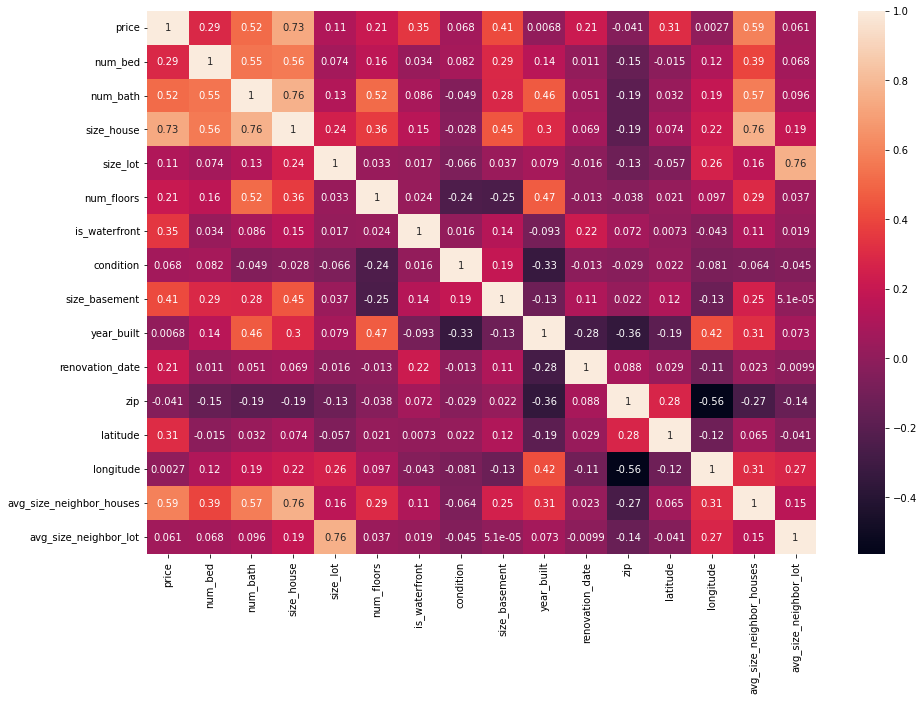

In [29]:
# matriz de correlação
plt.figure(figsize=(15,10))
sns.heatmap(df_train_house.corr(), annot=True)
plt.show()

Vamos remover todas as features que não tem correlação estatisticamente significante.

In [30]:
# vamos manter essas
correlation_features

['price',
 'num_bed',
 'num_bath',
 'size_house',
 'size_lot',
 'num_floors',
 'condition',
 'size_basement',
 'renovation_date',
 'latitude',
 'avg_size_neighbor_houses',
 'avg_size_neighbor_lot']

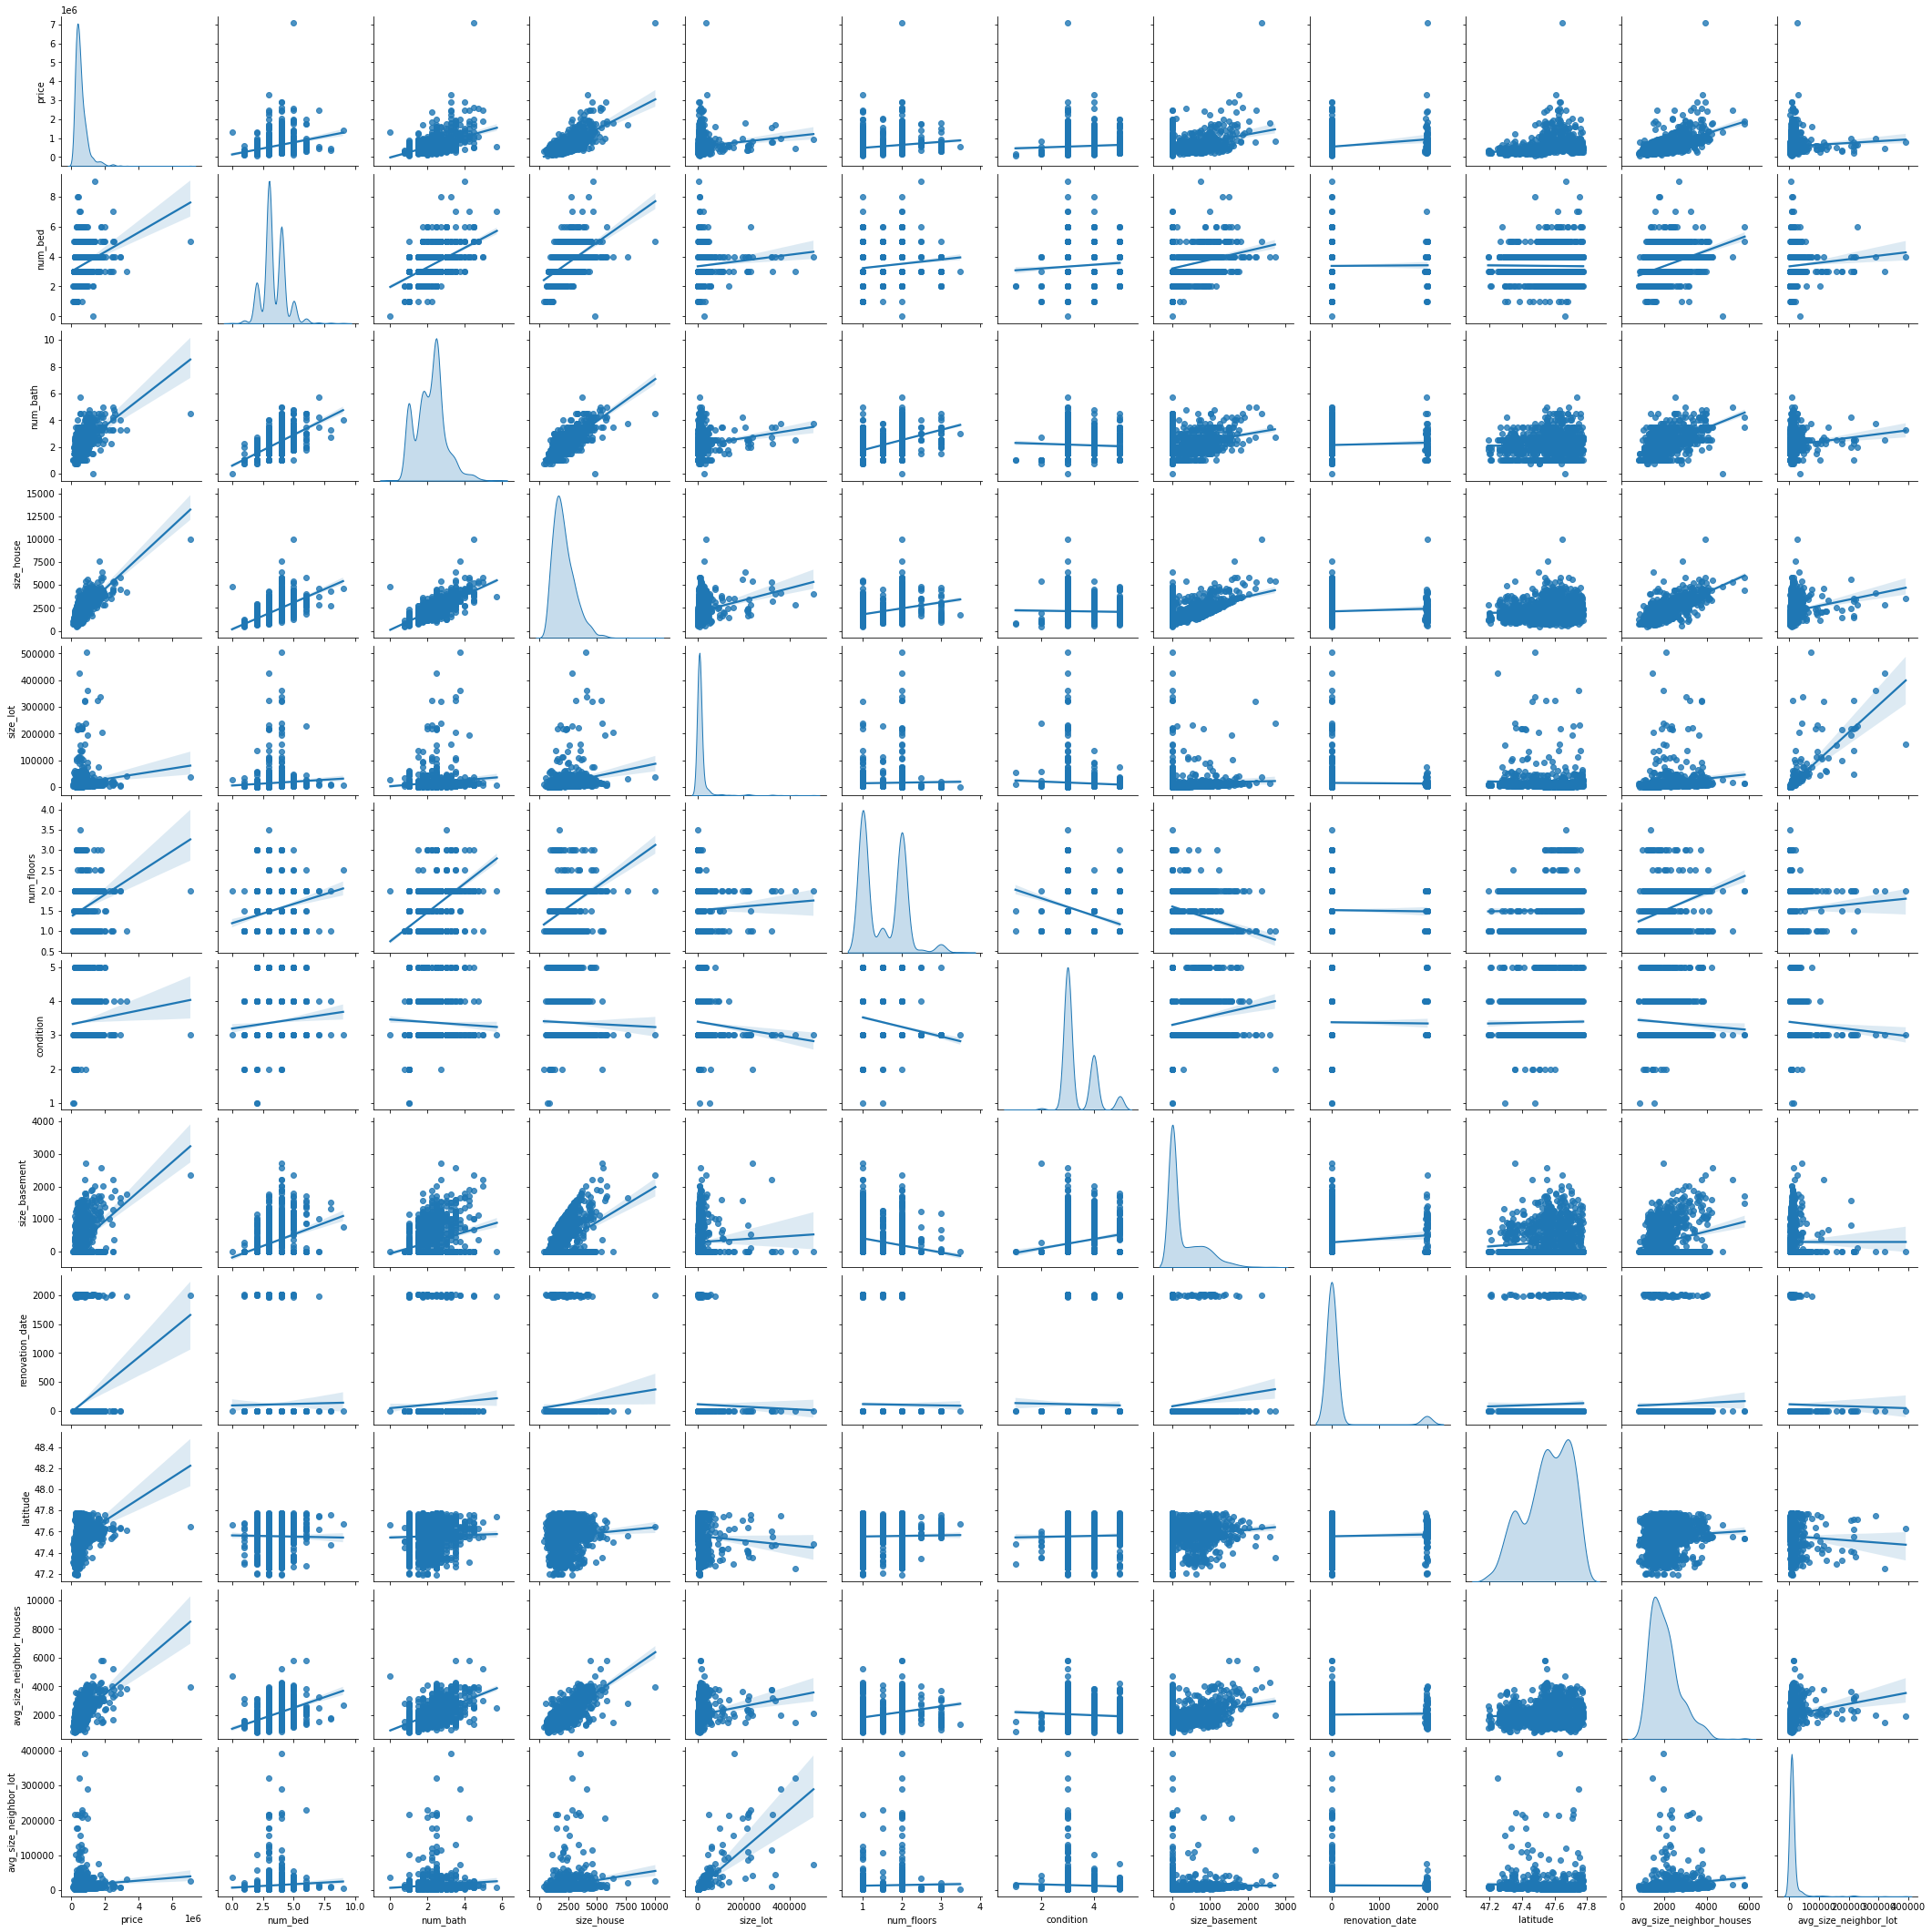

In [31]:
# pairplot
sns.pairplot(df_train_house.loc[:,correlation_features], diag_kind='kde', kind='reg')
plt.show()

A variável zip possui muitos níveis, poderíamos transformá-la em dummy, mas adicionaríamos muito preditores. Precisaríamos encontrar uma forma de agrupar esses dados. Porém, já seria um step de feature engineering, o qual ainda não estudamos. Por enquanto, vamos nos limitar a não utilizar essa variável.

# Modelagem e Avaliação dos Resultados

Nessa fase, espera-se que você crie o modelo com as variáveis que foram selecionadas e avalie o modelo checando os critérios que estudamos:
- Multicolinearidade
- Homocedasticidade dos resíduos
- Autocorrelação dos Resíduos
- Média 0 nos resíduos
- Estatística F
- P-valores
- MAE, MAPE, MSE, R2

## Multicolinearidade

Vamos eliminando as features para remover multicolinearidade.

In [32]:
correlation_features.remove('price')

In [33]:
def multicolinearidade(df, features):
    vif_data = pd.DataFrame()
    vif_data['feature'] = df.loc[: , features].columns
    
    vif_data["VIF"] = [variance_inflation_factor(df.loc[: , features].values, i) for i in range(len(df.loc[: , features].columns))]
    return vif_data.sort_values(by = 'VIF' , ascending = False)

In [34]:
correlation_features

['num_bed',
 'num_bath',
 'size_house',
 'size_lot',
 'num_floors',
 'condition',
 'size_basement',
 'renovation_date',
 'latitude',
 'avg_size_neighbor_houses',
 'avg_size_neighbor_lot']

In [35]:
multicolinearidade(df_train_house , correlation_features)

,feature,VIF
8,latitude,60.888711
5,condition,33.529701
2,size_house,30.453791
1,num_bath,26.374195
9,avg_size_neighbor_houses,22.689583
0,num_bed,22.385875
4,num_floors,17.121098
10,avg_size_neighbor_lot,2.891168
3,size_lot,2.877475
6,size_basement,2.545819


Vamos remover começando com a de maior multicolinearidade.

In [36]:
correlation_features.remove('latitude')

In [37]:
multicolinearidade(df_train_house , correlation_features)

,feature,VIF
2,size_house,28.767393
1,num_bath,26.363126
8,avg_size_neighbor_houses,20.519031
0,num_bed,20.164298
4,num_floors,14.160172
5,condition,13.542032
9,avg_size_neighbor_lot,2.891008
3,size_lot,2.860409
6,size_basement,2.536751
7,renovation_date,1.073813


In [38]:
correlation_features.remove('size_house')

In [39]:
multicolinearidade(df_train_house , correlation_features)

,feature,VIF
1,num_bath,21.886073
0,num_bed,19.464198
3,num_floors,13.987015
7,avg_size_neighbor_houses,13.884843
4,condition,12.148372
8,avg_size_neighbor_lot,2.890365
2,size_lot,2.781368
5,size_basement,2.100992
6,renovation_date,1.072958


In [40]:
correlation_features.remove('num_bath')
multicolinearidade(df_train_house, correlation_features)

,feature,VIF
0,num_bed,16.706231
6,avg_size_neighbor_houses,12.488443
3,condition,11.916182
2,num_floors,9.968077
7,avg_size_neighbor_lot,2.888852
1,size_lot,2.772953
4,size_basement,1.878624
5,renovation_date,1.072021


In [41]:
correlation_features.remove('num_bed')
multicolinearidade(df_train_house, correlation_features)

,feature,VIF
5,avg_size_neighbor_houses,11.099645
1,num_floors,9.155303
2,condition,8.705645
6,avg_size_neighbor_lot,2.888262
0,size_lot,2.772567
3,size_basement,1.786470
4,renovation_date,1.071955


In [42]:
correlation_features.remove('avg_size_neighbor_houses')
multicolinearidade(df_train_house, correlation_features)

,feature,VIF
2,condition,7.318371
1,num_floors,6.252410
5,avg_size_neighbor_lot,2.876678
0,size_lot,2.760951
3,size_basement,1.557872
4,renovation_date,1.071935


## Modelo 1

Modelo 1 sem multicolinearidde

In [43]:
X_treino1 = df_train_house.loc[:,correlation_features]
X_treino1 = sm.add_constant(X_treino1)
Y_treino1 = df_train_house['price']
modelo_price1 = sm.OLS(Y_treino1, X_treino1)
modelo_price1 = modelo_price1.fit()

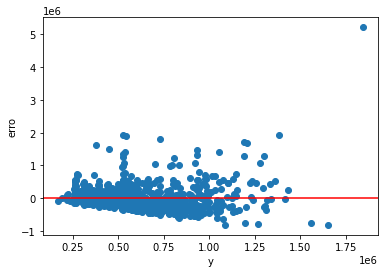

In [44]:
Y_predict_treino1 = modelo_price1.predict(X_treino1)
erro1 = (Y_treino1-modelo_price1.predict(X_treino1))
plt.scatter(Y_predict_treino1, erro1)
plt.axhline(0, color='r')
plt.xlabel('y')
plt.ylabel('erro')
plt.show()

Parece haver um pouco de heterocedasticidade. Pode ser devido ao range da variável resposta;

## Autocorrelação nos Resíduos

In [45]:
print(modelo_price1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     96.38
Date:                Mon, 16 Jan 2023   Prob (F-statistic):          4.28e-100
Time:                        21:16:55   Log-Likelihood:                -18296.
No. Observations:                1291   AIC:                         3.661e+04
Df Residuals:                    1284   BIC:                         3.664e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -1.47e+

Durbin-Watson está bem próximo de 2, então apresenta pouca autocorrelação.

A estatística F aponta que a regressão é válida, porém o p-valor da variável avg_size_neighbor_lot aponta que devemos removê-la.

In [46]:
correlation_features.remove('avg_size_neighbor_lot')
X_treino3 = df_train_house.loc[: , correlation_features]
X_treino3 = sm.add_constant(X_treino3)
modelo_price3 = sm.OLS(Y_treino1 , X_treino3)
modelo_price3 = modelo_price3.fit()

In [47]:
print(modelo_price3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     115.4
Date:                Mon, 16 Jan 2023   Prob (F-statistic):          7.42e-101
Time:                        21:34:41   Log-Likelihood:                -18297.
No. Observations:                1291   AIC:                         3.661e+04
Df Residuals:                    1285   BIC:                         3.664e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.486e+05   6.77e+04     

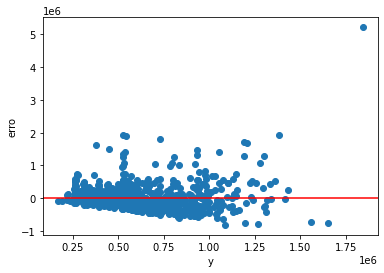

In [48]:
Y_predict_treino3 = modelo_price3.predict(X_treino3)
erro3 = (Y_treino1-Y_predict_treino3)
plt.scatter(Y_predict_treino1, erro3)
plt.axhline(0, color='r')
plt.xlabel('y')
plt.ylabel('erro')
plt.show()

In [49]:
# média do erro
erro3.mean()

-3.972188169230425e-11

OBS: Lembre-se que não necessariamente precisamos cumprir todas as regras que estudamos. Isso vai depender do seu objetivo. Se o foco é previsão, provavelmente você não precisaria se preocupar com esses pontos.

## Métricas de Erro

In [51]:
def mape(Y , y ):
    return np.mean(abs(Y-y)/ Y)

### Treinamento

In [52]:
# R2
r2_score(Y_treino1, Y_predict_treino3)

0.30979898266479944

In [54]:
# MSE
mse_treino = mean_squared_error(Y_treino1 ,Y_predict_treino3)
mse_treino

119550541674.35526

In [55]:
#RMSE
np.sqrt(mse_treino)

345760.8157011943

In [58]:
# MAPE
mape(Y_treino1 , Y_predict_treino3)

0.4415133267435019

### Teste

In [67]:
# X e Y do teste
Y_teste = df_test_house['price']
X_teste = df_test_house.loc[:,correlation_features]
X_teste = sm.add_constant(X_teste)

In [69]:
# gerando previsao
Y_predict_test = modelo_price3.predict(X_teste)

In [71]:
# R2
r2_score(Y_teste, Y_predict_test)

0.2791423899917155

In [72]:
# MSE
mse_test = mean_squared_error(Y_teste, Y_predict_test)

In [73]:
# RMSE
np.sqrt(mse_test)

314430.07962323166

In [75]:
# MAPE
mape_teste = mape(Y_teste, Y_predict_test)
mape_teste

0.4667478079280965